In [ ]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
# modelo CNN
def define_model():
	model = Sequential()
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((8, 6)))
	model.add(Flatten())
	model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
 
  # compilar o modelo
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# plotar os resultados
def summarizar_resultados(history):

   pyplot.title('Acurácia e Custo na Classificação')
   pyplot.plot(history.history['accuracy'], color='blue', label='Acurácia')
   pyplot.plot(history.history['loss'], color='red', label='Custo')
   pyplot.xlabel('Epocas')
   pyplot.ylabel('Acurácia x Custo')
   pyplot.legend()
        
   pyplot.show()

In [ ]:
def Executar_CNN():
	model = define_model()
	# criar gerador de dados
	geradordedados = ImageDataGenerator(rescale=1.0/255.0)
	# iterar nas pastas gerando os dados de treinamento e de testes
	treino = geradordedados.flow_from_directory('/content/drive/MyDrive/Foto de Semaforos e Hidrantes/Foto de Semaforos e Hidrantes',
		class_mode='binary', batch_size=32, target_size=(200, 200))
	teste = geradordedados.flow_from_directory('/content/drive/MyDrive/Foto de Semaforos e Hidrantes/Teste',
		class_mode='binary', batch_size=32, target_size=(200, 200))
    
	# Executar o modelo
	history = model.fit_generator(treino, steps_per_epoch=len(treino),
		validation_data=teste, validation_steps=len(teste), epochs=100, verbose=1)
 
	
    # apresentar os resultados 
	summarizar_resultados(history)


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Found 57 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


Epoch 1/100
2/2 [==============================] - 12s 9s/step - loss: 0.9151 - accuracy: 0.5614
Epoch 2/100
2/2 [==============================] - 3s 903ms/step - loss: 1.6592 - accuracy: 0.5088
Epoch 3/100
2/2 [==============================] - 3s 1s/step - loss: 0.9377 - accuracy: 0.5088
Epoch 4/100
2/2 [==============================] - 3s 1s/step - loss: 0.8313 - accuracy: 0.6491
Epoch 5/100
2/2 [==============================] - 3s 1s/step - loss: 0.5673 - accuracy: 0.7018
Epoch 6/100
2/2 [==============================] - 3s 2s/step - loss: 0.6603 - accuracy: 0.5614
Epoch 7/100
2/2 [==============================] - 3s 1s/step - loss: 0.4072 - accuracy: 0.8421
Epoch 8/100
2/2 [==============================] - 3s 897ms/step - loss: 0.4280 - accuracy: 0.7895
Epoch 9/100
2/2 [==============================] - 3s 893ms/step - loss: 0.3821 - accuracy: 0.8070
Epoch 10/100
2/2 [==============================] - 3s 1s/step - loss: 0.2814 - accuracy: 0.9825
Epoch 11/100
2/2 [===========

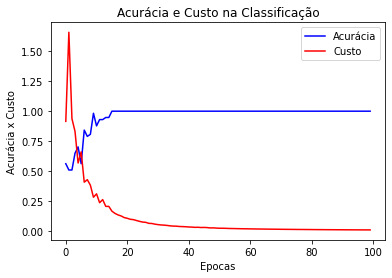

In [ ]:
# chamar o Executar CNN
Executar_CNN()